
0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 전처리

# transforms.Compose: 여러 전처리 단계를 하나로 묶음
transform = transforms.Compose([
    # 이미지를 PyTorch 텐서(0~1 사이 값)로 변환
    transforms.ToTensor(),
    # 데이터를 정규화 (평균 0.5, 표준편차 0.5로 설정하여 -1 ~ 1 사이 값으로 변환)
    # 모델의 학습 속도와 성능을 향상시키는 데 도움을 줌
    transforms.Normalize((0.5,), (0.5,))])

# 2. Training 데이터셋 다운로드 및 로드
trainset = datasets.FashionMNIST(
    './data', # 데이터 저장 경로
    download=True, # 경로에 데이터가 없으면 다운로드
    train=True,  # 학습용 데이터셋 선택
    transform=transform) # 위에서 정의한 전처리 적용

# DataLoader: 데이터를 batch_size만큼 쪼개서 모델에 공급함
# shuffle=True: 학습 시 데이터 순서를 섞어 모델의 과적합을 방지함
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# 3. Validation/Test 데이터셋 다운로드 및 로드
validationset = datasets.FashionMNIST(
    './data', 
    download=True, 
    train=False, 
    transform=transform)

# 테스트 시에도 데이터를 묶어서 공급하지만, 순서는 섞지 않아도 결과 평가에 지장이 없음
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:14<00:00, 1.88MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 91.3kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.52MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.9MB/s]


In [ ]:
# 1. trainset에서 첫 번째 데이터(이미지 하나와 정답 레이블 하나)를 가져옵니다.
# xx: 이미지 데이터 (텐서 형태)
# yy: 이미지에 해당하는 클래스 번호 (정수 형태)
xx, yy = trainset[0]

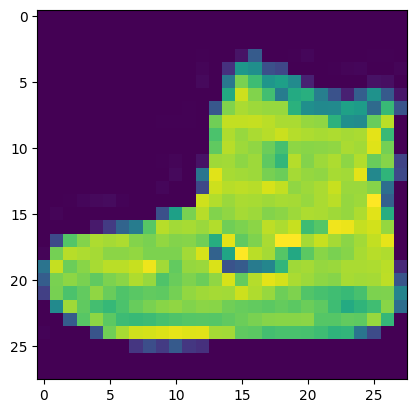

이 이미지의 레이블 번호는 9이며, 해당하는 이름은 'Ankle boot'입니다.


In [9]:
# 2. 이미지 시각화
# Normalize 과정에서 -1 ~ 1 사이로 변한 값을 시각화하기 위해 
# 다시 28x28 크기로 형태를 바꿔줌(reshape).
plt.imshow(xx.reshape(28,28))
plt.show()

# 3. 레이블 번호를 사람이 읽을 수 있는 텍스트로 매칭하는 딕셔너리
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(f"이 이미지의 레이블 번호는 {yy}이며, 해당하는 이름은 '{my_name[yy]}'입니다.")

In [33]:
# 1. 테스트 로더에서 모든 데이터를 꺼내 리스트에 담음
x_list = []
y_list = []

for images, labels in test_loader:
    # 이미지를 1차원(784)으로 펼쳐서 리스트에 추가
    x_list.append(images.view(-1, 784))
    y_list.append(labels)

# 2. 리스트에 담긴 여러 텐서들을 하나로 합침 (concatenate)
x_test = torch.cat(x_list, dim=0)
y_test = torch.cat(y_list, dim=0)

print(f"테스트 데이터:{x_test.shape}") 

테스트 데이터:torch.Size([10000, 784])


다중로지스틱회귀모델
>모델이름: z_model

>PyTorch의 표준 방식(Logit 출력 + CrossEntropyLoss)으로 설계되어 이미 학습을 완료한 모델 z_model을 새로 정의함

>정의방식: nn.Linear(784, 10)

모델 정의 및 학습루프

Epoch 1/10, Loss: 0.6830
Epoch 2/10, Loss: 0.5185
Epoch 3/10, Loss: 0.4854
Epoch 4/10, Loss: 0.4680
Epoch 5/10, Loss: 0.4563
Epoch 6/10, Loss: 0.4479
Epoch 7/10, Loss: 0.4414
Epoch 8/10, Loss: 0.4362
Epoch 9/10, Loss: 0.4316
Epoch 10/10, Loss: 0.4283


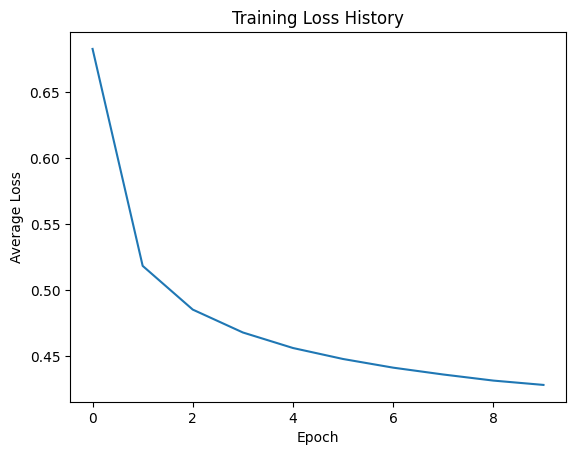

In [ ]:
# 1. 모델 정의
# 기존에 학습된 가중치는 사라지고 무작위 값으로 초기화
# 입력: 28x28 이미지 = 784픽셀 / 출력: 10개 클래스
# nn.Linear: 입력 데이터에 대해 y = xA^T + b 연산을 수행함
z_model = nn.Linear(784, 10, bias=True)

# 2. 손실 함수 (Loss Function)
# CrossEntropyLoss는 다중 클래스 분류에 사용되며, Softmax 연산을 내장하고 있음
loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

# 3. 옵티마이저 (Optimizer)
# 옵티마이저도 새 가중치를 바라보도록 다시 정의해줌
# SGD(확률적 경사 하강법)를 사용하여 모델의 가중치를 업데이트함, lr= 학습률
optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)

history=[]
epochs = 10
n = len(trainset)  # 전체 데이터 개수: 나중에 평균 손실을 구하기 위함

# 4. 학습 루프
for epoch in range(epochs):
    epoch_loss = 0.0
    for xx, tt in train_loader:
        # 데이터 변형: (batch_size, 1, 28, 28) -> (batch_size, 784)
        # Linear 레이어는 1차원 벡터 형태의 입력을 받기 때문에 view나 flatten이 필요함
        xx = xx.view(-1, 784)

        # 순전파 (Forward pass): 모델에 데이터를 넣어 예측값 계산
        zhat = z_model(xx)
        
        # 손실 계산: 예측값(zhat)과 실제 정답(tt)의 차이 측정
        loss = loss_fn(zhat, tt)
        
        # 역전파 (Backward pass): 손실을 바탕으로 기울기(gradient) 계산
        loss.backward()
        
        # 가중치 업데이트 및 기울기 초기화
        optimizer.step()
        optimizer.zero_grad()
        
        # epoch별 총 손실 누적 (loss.item()은 배치당 평균이므로 배치 크기를 곱해줌)
        epoch_loss += loss.item() * len(xx)
    history.append(epoch_loss/n)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/n:.4f}")

# 5. 학습 결과 시각화
plt.plot(history)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss History')
plt.show()

In [42]:
# 시각화 스타일 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

오답 데이터 추출 및 시각화

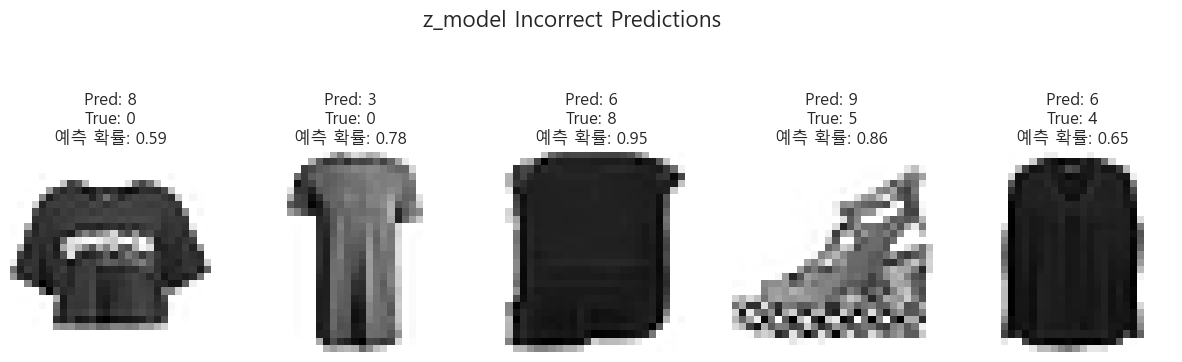

In [46]:
# 1. 오답 샘플을 담을 리스트
z_incorrect_examples = []

# 2. 모델을 평가 모드로 설정
z_model.eval()

with torch.no_grad():
    for xx, tt in test_loader:
        # 데이터 모양 변경 (Linear 레이어 입력에 맞게)
        xx_flat = xx.view(xx.size(0), 784)
        
        # 모델 예측 (z_model은 Softmax를 거치기 전의 '점수(Logit)'를 내뱉습니다)
        zhat = z_model(xx_flat)
        
        # 가장 높은 점수를 받은 클래스 선택
        yhat = torch.argmax(zhat, dim=1)

        # 배치 내에서 틀린 사례 찾기
        for i in range(len(tt)):
            if yhat[i] != tt[i]:
                # 이미지, 예측값, 실제값 저장 (시각화를 위해 다시 28x28로)
                z_incorrect_examples.append((xx[i].view(28, 28), yhat[i].item(), tt[i].item()))
        
        # 5개만 모이면 중단
        if len(z_incorrect_examples) >= 5:
            break

with torch.no_grad():
    q = torch.softmax(z_model(xx_flat), dim=1)
    conf, pred = torch.max(q, dim=1)

# 3. 오답 시각화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, (img, pred, true) in enumerate(z_incorrect_examples[:5]):
    axes[i].imshow(img, cmap='binary')
    axes[i].set_title(f"Pred: {pred}\nTrue: {true}\n예측 확률: {conf[i].item():.2f}")
    axes[i].axis('off')
plt.suptitle("z_model Incorrect Predictions", fontsize=16)
plt.show()

전체 정확도(Accuracy) 산출

In [38]:
# 전체 테스트 데이터셋에 대한 성능 측정
z_correct = 0
z_total = 0

z_model.eval() # 평가 모드 유지

with torch.no_grad():
    for xx, tt in test_loader:
        # 데이터 전처리
        xx = xx.view(xx.size(0), 784)
        
        # 예측
        zhat = z_model(xx)
        yhat = torch.argmax(zhat, dim=1)
        
        # 맞춘 개수와 전체 개수 누적
        z_correct += (yhat == tt).sum().item()
        z_total += tt.size(0)

# 최종 결과 계산
z_accuracy = (z_correct / z_total) * 100
print(f"[z_model] 최종 테스트 정확도: {z_accuracy:.2f}%")
print(f"전체 {z_total}개 중 {z_correct}개를 맞혔습니다!")

[z_model] 최종 테스트 정확도: 83.53%
전체 10000개 중 8353개를 맞혔습니다!


---

>모델이름: softmax_ftn

>정의방식: class SoftmaxModel

>직접 클래스로 설계도를 만들어서 새로 생성한 다중 로지스틱 회귀 모델

SoftmaxModel 직접 정의

In [ ]:
class SoftmaxModel(torch.nn.Module):
    def __init__(self, input_units, output_units):
        super().__init__()
        # 선형 변환 층 (784 -> 10)
        self.linear = torch.nn.Linear(input_units, output_units, bias=True)

    def forward(self, X):
        # 입력 데이터 펼치기 
        X = X.view(X.size(0), -1)
        
        # 선형 연산 (Z = XW + b)
        Z = self.linear(X)
        
        # softmax 수식 직접 구현 
        # 지수 함수를 취해 모든 값을 양수로 만듦
        exp_Z = torch.exp(Z)
        # 각 행의 합으로 나누어 확률로 만듦
        Q = exp_Z / torch.sum(exp_Z, axis=1, keepdim=True)
        
        return Q

# 클래스를 사용해 인스턴스 생성
num_classes = 10
softmax_ftn = SoftmaxModel(784, num_classes)

In [ ]:
# # 예시: 테스트 데이터 한 장 넣어보기
# sample_image = x_test[0].view(1, 784) # 첫 번째 이미지
# prediction = softmax_ftn(sample_image) # 모델 통과
# print(prediction) # 10개 클래스에 대한 확률값이 나옴

tensor([[0.0776, 0.1698, 0.1283, 0.0615, 0.1355, 0.0956, 0.0818, 0.0789, 0.0761,
         0.0950]], grad_fn=<DivBackward0>)


softmax_ftn 학습 루프

In [29]:
import torch.optim as optim

# 1. 옵티마이저 설정 (공부할 모델의 파라미터 전달)
optimizer = optim.SGD(softmax_ftn.parameters(), lr=0.01)

# 2. 손실 함수 설정 
# softmax_ftn이 확률을 반환하므로, 로그를 취해 NLLLoss를 쓰거나 
# 학습 효율을 위해 CrossEntropyLoss를 사용
loss_fn = torch.nn.CrossEntropyLoss()

epochs = 10
softmax_ftn.train() # 모델을 학습 모드로 전환

for epoch in range(epochs):
    total_loss = 0
    for xx, tt in train_loader:
        # X 데이터는 forward 내부에서 view(-1, 784)를 하므로 그대로 넣어줍니다.
        outputs = softmax_ftn(xx) 
        
        # 손실 계산
        loss = loss_fn(outputs, tt)
        
        # 역전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 1.8956
Epoch 2/10, Loss: 1.7542
Epoch 3/10, Loss: 1.7303
Epoch 4/10, Loss: 1.7176
Epoch 5/10, Loss: 1.7092
Epoch 6/10, Loss: 1.7030
Epoch 7/10, Loss: 1.6983
Epoch 8/10, Loss: 1.6945
Epoch 9/10, Loss: 1.6913
Epoch 10/10, Loss: 1.6887


오답 데이터 추출 및 시각화

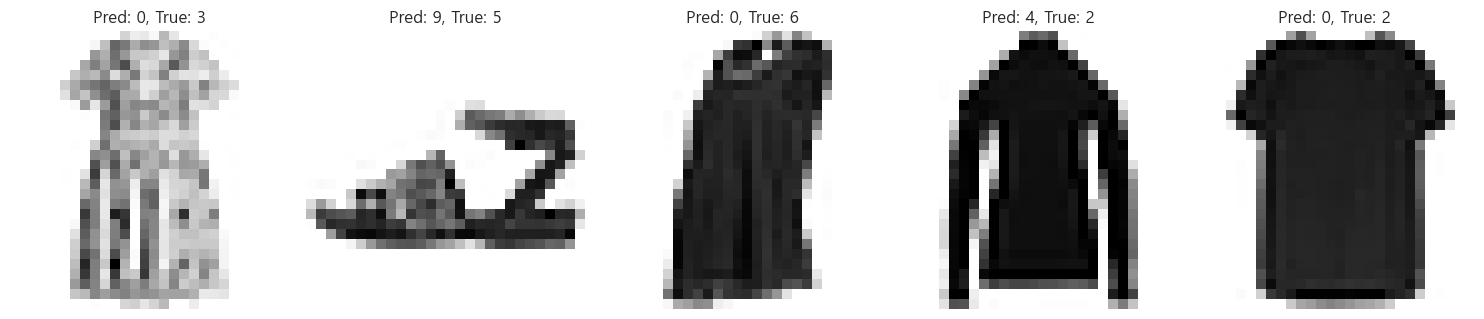

In [48]:
import matplotlib.pyplot as plt

incorrect_examples = [] # [(이미지, 예측한 번호, 실제 정답 번호)]
softmax_ftn.eval() # 모델을 평가 모드로 전환

with torch.no_grad():
    for xx, tt in test_loader:
        q = softmax_ftn(xx) # 확률 도출
        yhat = torch.argmax(q, axis=1) # 가장 높은 확률의 클래스 선택

        for i in range(len(tt)):
            if yhat[i] != tt[i]:
                # 틀린 이미지를 28x28로 다시 펴서 저장
                incorrect_examples.append((xx[i].view(28, 28), yhat[i].item(), tt[i].item()))

        if len(incorrect_examples) >= 5:
            break

# 시각화 실행
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, (image, pred_label, true_label) in enumerate(incorrect_examples[:5]):
    # cpu(): 데이터를 CPU로 옮겨 그릴 수 있게 해줌
    axes[i].imshow(image.cpu(), cmap='binary')
    # 제목에 예측값과 실제 정답을 표시하여 비교
    axes[i].set_title(f"Pred: {pred_label}, True: {true_label}")
    axes[i].axis("off") # 격자 숨기기 
    
plt.tight_layout()
plt.show()

전체 정확도(Accuracy) 구하기

In [39]:
# 전체 테스트 데이터셋(10,000장)에 대한 최종 성능 측정
correct_count = 0
total_count = 0

with torch.no_grad():
    for xx, tt in test_loader:
        q = softmax_ftn(xx)
        yhat = torch.argmax(q, axis=1)
        
        # 맞춘 개수 누적
        correct_count += (yhat == tt).sum().item()
        # 전체 개수 누적
        total_count += tt.size(0)

final_acc = (correct_count / total_count) * 100
print(f" [SoftmaxModel] 최종 테스트 정확도: {final_acc:.2f}%")
print(f"전체 {total_count}개 중 {correct_count}개를 맞혔습니다!")

 [SoftmaxModel] 최종 테스트 정확도: 78.60%
전체 10000개 중 7860개를 맞혔습니다!


| 구분 | z_model (`nn.Linear`) | SoftmaxModel (`class`) |
|---|---|---|
| 구조 | 단순 부품 (Linear Layer) | 부품 + 조립법 (Custom Class) |
| 출력값 | 점수 (Logit) | 확률 (Probability) |
| 장점 | 코드가 간결하고 표준적임 | 모델 내부 동작을 직접 제어 가능 |
| 주의점 | `CrossEntropyLoss`와 찰떡궁합 | `CrossEntropyLoss` 사용 시 Softmax 중복 주의 |
